## Dataset Overview
This project analyzes historical data from the S&P 500 index to identify trends, measure volatility, and assess risk through exploratory data analysis and feature engineering.

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Resources/SP500.csv'  # Adjusted for new structure
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())

         Date         Open         High          Low        Close  \
0  2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971   
1  2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044   
2  2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985   
3  2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951   
4  2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971   

     Adj Close      Volume  
0  1455.219971   931800000  
1  1399.420044  1009000000  
2  1402.109985  1085500000  
3  1403.449951  1092300000  
4  1441.469971  1225200000  


In [2]:
# Check data types and null values
print(data.info())

# Summary statistics for numerical columns
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5169 non-null   object 
 1   Open       5169 non-null   float64
 2   High       5169 non-null   float64
 3   Low        5169 non-null   float64
 4   Close      5169 non-null   float64
 5   Adj Close  5169 non-null   float64
 6   Volume     5169 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 282.8+ KB
None
              Open         High          Low        Close    Adj Close  \
count  5169.000000  5169.000000  5169.000000  5169.000000  5169.000000   
mean   1613.173457  1622.565707  1602.945899  1613.345173  1613.345173   
std     624.183200   625.841249   622.219836   624.256928   624.256928   
min     679.280029   695.270020   666.789978   676.530029   676.530029   
25%    1158.150024  1166.969971  1148.040039  1158.310059  1158.310059   
50%    1374.060059  1

In [3]:
# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Check for missing values
print(data.isnull().sum())

# Optionally fill missing values
data.fillna(method='ffill', inplace=True)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


/var/folders/7r/llhq8th56k73wjyrcv5w381h0000gn/T/ipykernel_36465/57554559.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [4]:
data['Daily Return'] = data['Close'].pct_change()

In [5]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

In [6]:
data['Volatility'] = data['Close'].rolling(window=20).std()

In [7]:
# Calculate Cumulative Return
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

# Inspect the data to ensure the feature is added
print(data[['Daily Return', 'Cumulative Return']].head())

            Daily Return  Cumulative Return
Date                                       
2000-01-03           NaN                NaN
2000-01-04     -0.038345           0.961655
2000-01-05      0.001922           0.963504
2000-01-06      0.000956           0.964425
2000-01-07      0.027090           0.990551


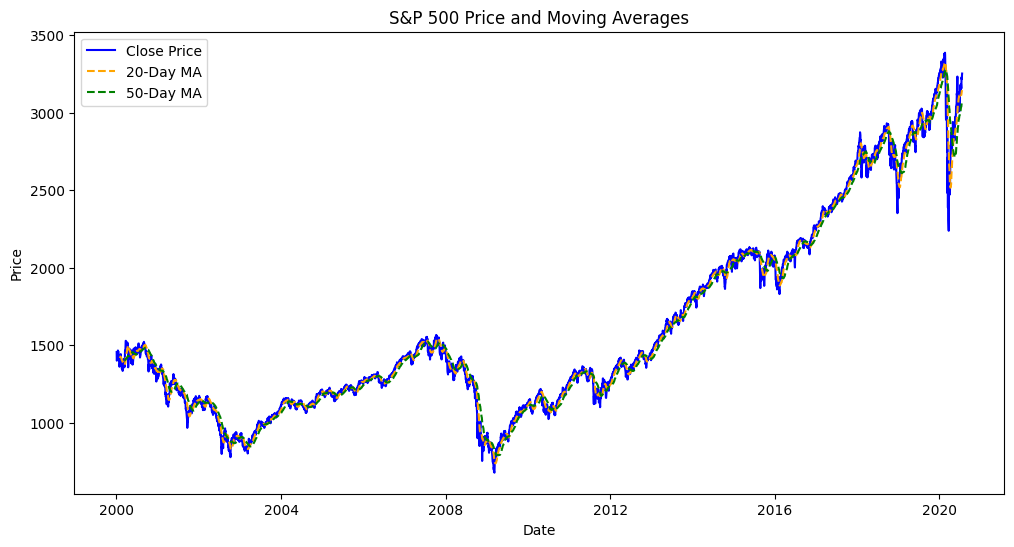

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA_20'], label='20-Day MA', linestyle='--', color='orange')
plt.plot(data['MA_50'], label='50-Day MA', linestyle='--', color='green')
plt.title('S&P 500 Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

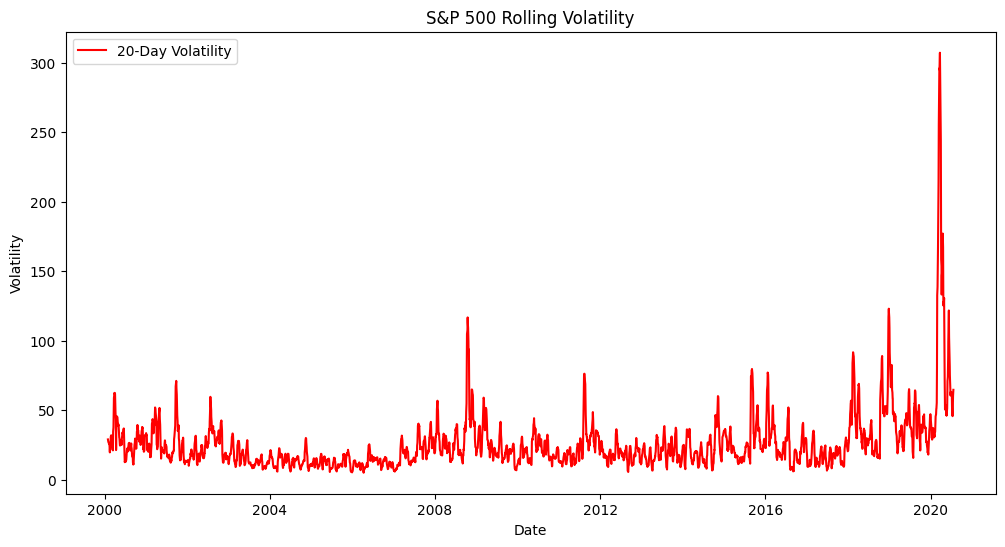

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility'], label='20-Day Volatility', color='red')
plt.title('S&P 500 Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

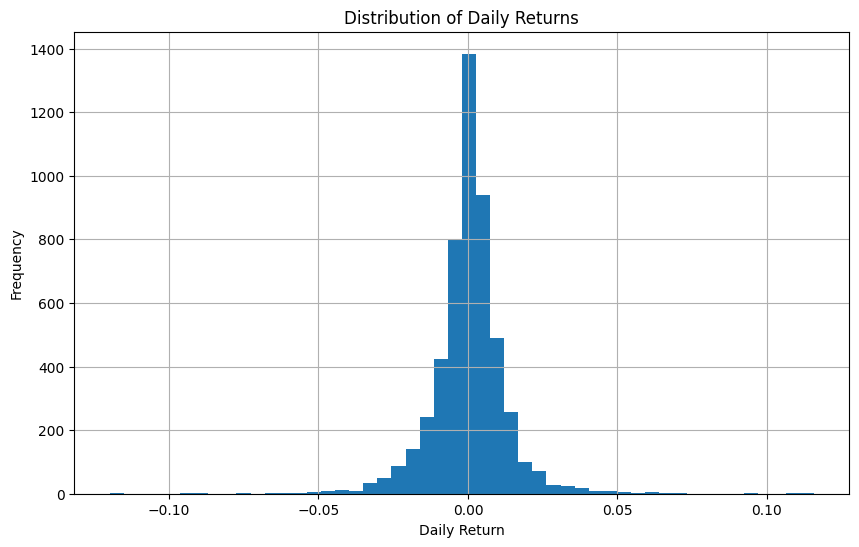

In [10]:
data['Daily Return'].hist(bins=50, figsize=(10, 6))
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

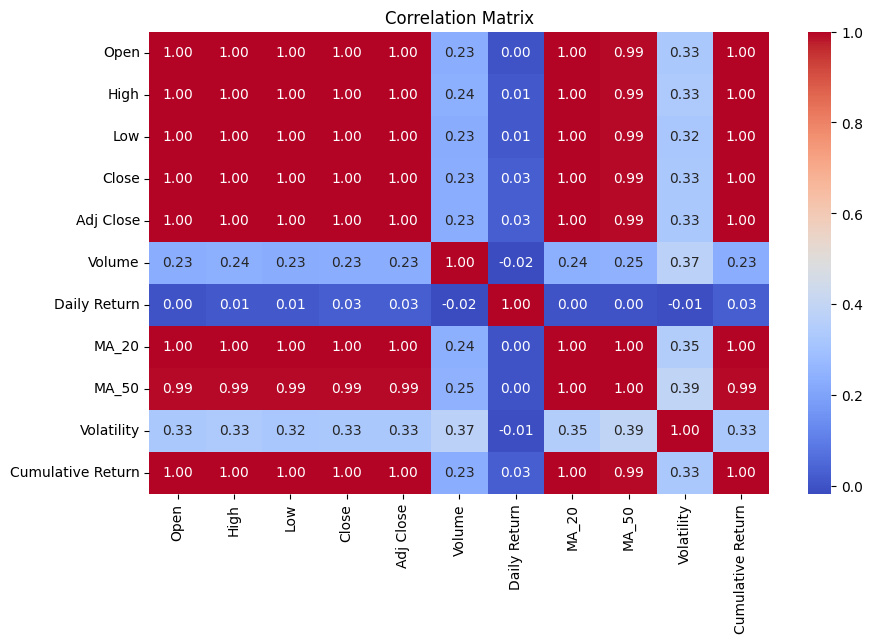

In [11]:
# Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = data.corr()

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

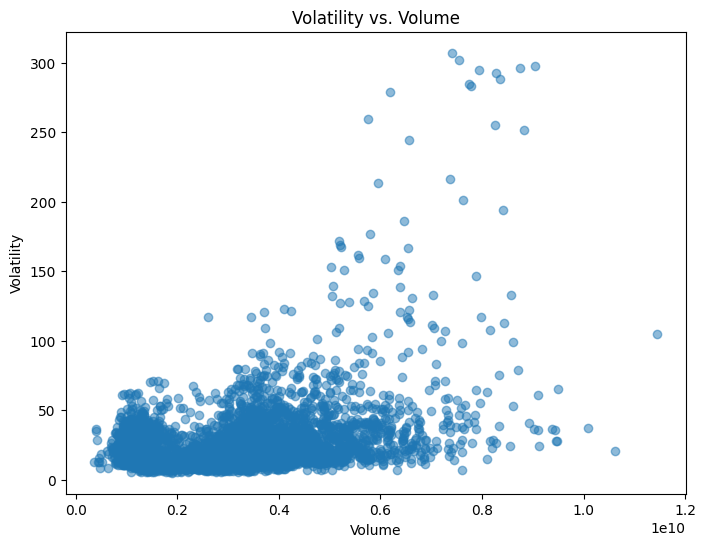

In [12]:
# Scatterplot: Volume vs. Volatility
plt.figure(figsize=(8, 6))
plt.scatter(data['Volume'], data['Volatility'], alpha=0.5)
plt.title('Volatility vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Volatility')
plt.show()

## Scatterplot Insights
The scatterplot shows a positive relationship between `Volume` and `Volatility`. Higher trading activity often coincides with higher market turbulence, but the relationship is not strictly linear.

In [13]:
data.to_csv('Cleaned_SP500.csv', index=True)

## Conclusion
This analysis offers meaningful insights into the trends and dynamics of the S&P 500 index. The use of moving averages (20-day and 50-day) demonstrates their effectiveness in identifying long-term and short-term price trends, providing a clearer perspective on market momentum. Additionally, the analysis of volatility highlights periods of heightened market uncertainty, which can serve as early indicators of instability or shifts in investor sentiment. By examining these metrics alongside trading activity, this project helps to better understand market behavior, enabling more data-driven and informed decision-making for investors and analysts.